In [2]:
import numpy as np
import pandas as pd

from wrangle import *
from env import *

In [3]:
url = get_db_url('mall_customers')

query = '''
            SELECT *
            FROM customers
        '''

df = pd.read_sql(query,url)

In [4]:
df.head(5)

customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007      26.264721       25.823522
min       1.000000   18.000000      15.000000        1.000000
25%      50.750000   28.750000      41.500000       34.750000
50%     100.500000   36.000000      61.500000       50.000000
75%     150.250000   49.000000      78.000000       73.000000
max     200.000000   70.000000     137.000000       99.000000

In [8]:
summary(df)

column_name  num_rows_missing  pct_rows_missing
0     customer_id                 0               0.0
1          gender                 0               0.0
2             age                 0               0.0
3   annual_income                 0               0.0
4  spending_score                 0               0.0

In [9]:
df.value_counts()

customer_id  gender  age  annual_income  spending_score
1            Male    19   15             39                1
138          Male    32   73             73                1
128          Male    40   71             95                1
129          Male    59   71             11                1
130          Male    38   71             75                1
                                                          ..
70           Female  32   48             47                1
71           Male    70   49             55                1
72           Female  47   49             42                1
73           Female  60   50             49                1
200          Male    30   137            83                1
Length: 200, dtype: int64

In [10]:
num,cat = separate_column_type_list(df)

In [11]:
all_outliers = all_outliers(df)

/Users/dusts/codeup-data-science/clustering-exercises/wrangle.py:439: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))


In [12]:
all_outliers.sum()

age               0
annual_income     2
customer_id       0
gender            0
spending_score    0
dtype: int64

In [13]:
test = pd.DataFrame()
for col in num:
    test[f'{col}_upper_outliers']=upper_outlier_detector(df,col)
test.sum()

customer_id_upper_outliers       0
age_upper_outliers               0
annual_income_upper_outliers     2
spending_score_upper_outliers    0
dtype: int64

In [14]:
num

['customer_id', 'age', 'annual_income', 'spending_score']

In [15]:
my_list = ['annual_income']
hard_list = pd.DataFrame()
for col in my_list:
    hard_list[f'{col}_upper_outliers']=upper_outlier_detector(df,col)
hard_list.sum()

annual_income_upper_outliers    2
dtype: int64

In [16]:
lower_outliers_summary(df)

annual_income_upper_outliers     2
customer_id_upper_outliers       0
age_upper_outliers               0
spending_score_upper_outliers    0
dtype: int64

In [17]:
all_outliers_summary(df)

annual_income_upper_outliers     2
customer_id_upper_outliers       0
customer_id_lower_outliers       0
age_upper_outliers               0
age_lower_outliers               0
annual_income_lower_outliers     0
spending_score_upper_outliers    0
spending_score_lower_outliers    0
dtype: int64

In [18]:
num,_ = separate_column_type_list(df)

<hr style="border:2px solid gray">

# E X E R C I S E S

# Mall

#### 1. Acquire

In [18]:
mall_df = wrangle_mall()

Reading CSV


In [19]:
mall_df.head()

customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40

#### 2. Summarize

In [20]:
summary(mall_df)

column_name  num_rows_missing  pct_rows_missing
0     customer_id                 0               0.0
1          gender                 0               0.0
2             age                 0               0.0
3   annual_income                 0               0.0
4  spending_score                 0               0.0

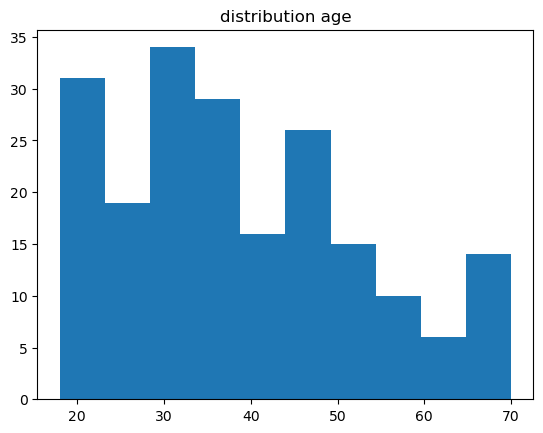

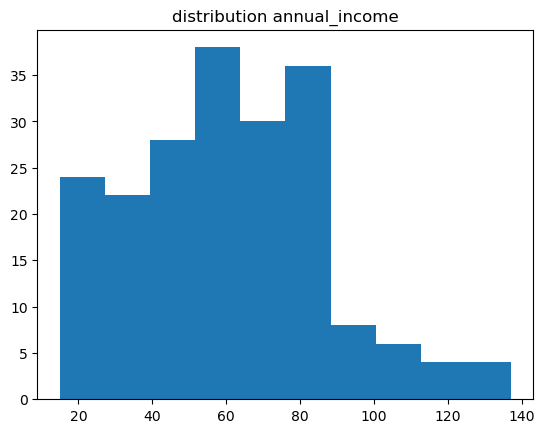

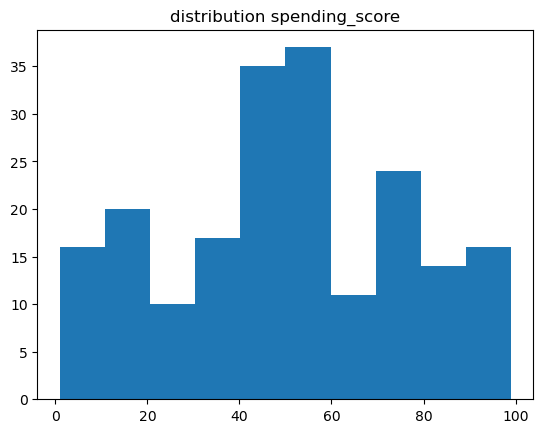

In [21]:
get_distributions(df)

#### 3. Outliers

In [22]:
all_outliers_summary(mall_df)

annual_income_upper_outliers     2
age_upper_outliers               0
age_lower_outliers               0
annual_income_lower_outliers     0
spending_score_upper_outliers    0
spending_score_lower_outliers    0
dtype: int64

#### 4. Split

In [23]:
train,val,test = split_data(mall_df)

In [24]:
train.head()

customer_id  gender  age  annual_income  spending_score
114          115  Female   18             65              48
173          174    Male   36             87              92
5              6  Female   22             17              76
126          127    Male   43             71              35
117          118  Female   49             65              59

#### 5. Dummies

In [25]:
train_dummies = pd.get_dummies(train)

# encode function
* Make Dummies using discrete_df or use list
    to filter original df, drop first
* Remove discrete columns from original df
    or start off with new df
```python
def encode_df(df):
    _,cat = separate_(df)
    
```

In [26]:
train_dummies

customer_id  age  annual_income  spending_score  gender_Female  \
114          115   18             65              48              1   
173          174   36             87              92              0   
5              6   22             17              76              1   
126          127   43             71              35              0   
117          118   49             65              59              1   
..           ...  ...            ...             ...            ...   
106          107   66             63              50              1   
14            15   37             20              13              0   
92            93   48             60              49              0   
179          180   35             93              90              0   
102          103   67             62              59              0   

     gender_Male  
114            0  
173            1  
5              0  
126            1  
117            0  
..           ...  
106            0  
14             1  
92             1  
179            1  
102            1  

[150 rows x 6 columns]

#### 6. Handle Missing Values

In [27]:
handle_missing_values(df,.6,.4)

customer_id  gender  age  annual_income  spending_score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]

#### 7. Scale Data

In [28]:
scaled_df = scale_data(df)